In [1]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_22444/1553097259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = pd.to_datetime(df_cleaned['year'], format='%Y')


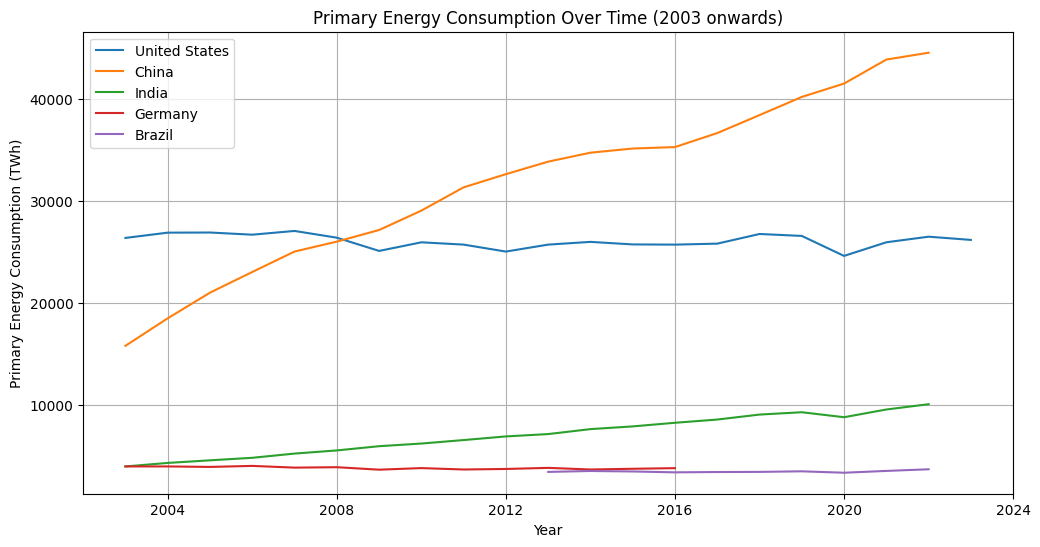

Filtered data has been saved to 'owid-energy-data-from-2003.csv'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and clean the data
df = pd.read_csv('owid-energy-data.csv')
df_cleaned = df.dropna(thresh=df.shape[1] - 3)

# Convert 'year' to datetime
df_cleaned['year'] = pd.to_datetime(df_cleaned['year'], format='%Y')

# Filter data from 2003 onwards
df_filtered = df_cleaned[df_cleaned['year'].dt.year >= 2003]

# Save the filtered data to a new CSV file
df_filtered.to_csv('owid-energy-data-from-2003.csv', index=False)

# Select a few countries and the 'primary_energy_consumption' column
countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
data_to_plot = df_filtered[df_filtered['country'].isin(countries)]

# Create the plot
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = data_to_plot[data_to_plot['country'] == country]
    plt.plot(country_data['year'], country_data['primary_energy_consumption'], label=country)

plt.title('Primary Energy Consumption Over Time (2003 onwards)')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption (TWh)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print("Filtered data has been saved to 'owid-energy-data-from-2003.csv'")

In [3]:
# Replace with the correct file path if the file is not in the same directory as your notebook
file_path = '/mnt/data/owid-energy-data-from-2003.csv'
energy_data = pd.read_csv(file_path)


In [5]:
energy_data.head()


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Africa,2003-01-01,NaN,8.823496e+08,NaN,10.272,0.050,0.613,0.541,2.867,...,0.002,0.002,20.744,0.259,1.553,0.601,0.53,1.760,0.104,0.044
1,Africa,2004-01-01,NaN,9.047816e+08,NaN,17.954,0.097,0.706,0.639,2.940,...,0.004,0.002,43.443,0.661,2.214,0.840,0.76,2.447,0.141,0.059
2,Africa,2005-01-01,NaN,9.278984e+08,NaN,-100.000,-0.639,0.000,0.000,2.867,...,0.004,0.002,1.576,0.021,2.235,0.841,0.78,2.408,0.139,0.059
3,Africa,2007-01-01,NaN,9.764617e+08,NaN,1000.486,0.722,0.813,0.794,2.960,...,0.005,0.003,19.202,0.448,2.874,1.034,1.01,2.943,0.166,0.072
4,Africa,2008-01-01,NaN,1.001982e+09,NaN,-23.106,-0.183,0.609,0.610,3.014,...,0.006,0.004,29.084,0.813,3.687,1.307,1.31,3.679,0.211,0.087


In [7]:
# Filter for rows where 'iso_code' is NaN
countries_without_iso_code = energy_data[energy_data['iso_code'].isna()]

# Get unique country names where 'iso_code' is NaN
unique_countries_without_iso_code = countries_without_iso_code['country'].drop_duplicates()

# Filter the original DataFrame to remove rows where 'country' is in the unique_countries_without_iso_code
remaining_countries = energy_data[~energy_data['country'].isin(unique_countries_without_iso_code)]

# Save the filtered out data into a new CSV file called "continent.csv"
countries_without_iso_code.to_csv('continent.csv', index=False)

# Save the remaining data into a new CSV file called "country.csv"
remaining_countries.to_csv('country.csv', index=False)


In [8]:
# Load the continent data
continent_data = pd.read_csv('continent.csv')

# Load the country data
country_data = pd.read_csv('country.csv')

In [10]:
continent_data.head()



,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Africa,2003-01-01,NaN,8.823496e+08,NaN,10.272,0.050,0.613,0.541,2.867,...,0.002,0.002,20.744,0.259,1.553,0.601,0.53,1.760,0.104,0.044
1,Africa,2004-01-01,NaN,9.047816e+08,NaN,17.954,0.097,0.706,0.639,2.940,...,0.004,0.002,43.443,0.661,2.214,0.840,0.76,2.447,0.141,0.059
2,Africa,2005-01-01,NaN,9.278984e+08,NaN,-100.000,-0.639,0.000,0.000,2.867,...,0.004,0.002,1.576,0.021,2.235,0.841,0.78,2.408,0.139,0.059
3,Africa,2007-01-01,NaN,9.764617e+08,NaN,1000.486,0.722,0.813,0.794,2.960,...,0.005,0.003,19.202,0.448,2.874,1.034,1.01,2.943,0.166,0.072
4,Africa,2008-01-01,NaN,1.001982e+09,NaN,-23.106,-0.183,0.609,0.610,3.014,...,0.006,0.004,29.084,0.813,3.687,1.307,1.31,3.679,0.211,0.087


In [11]:
country_data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Argentina,2011-01-01,ARG,41520736.0,8.377427e+11,46.423,2.750,208.889,8.673,33.477,...,0.000,0.000,4.887,0.003,0.073,0.723,0.03,1.767,0.023,0.008
1,Argentina,2012-01-01,ARG,41952364.0,8.291474e+11,19.876,1.724,247.831,10.397,34.563,...,0.007,0.002,1290.953,0.941,1.014,8.820,0.37,24.174,0.272,0.107
2,Argentina,2013-01-01,ARG,42388268.0,8.490883e+11,14.478,1.505,280.795,11.902,36.095,...,0.014,0.004,22.574,0.221,1.236,10.616,0.45,29.149,0.323,0.126
3,Argentina,2014-01-01,ARG,42824064.0,8.277508e+11,16.710,1.989,324.379,13.891,34.560,...,0.014,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.448,0.171
4,Argentina,2015-01-01,ARG,43257064.0,8.503567e+11,8.925,1.240,349.792,15.131,34.445,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.406,0.160
